In [1]:
#import required modules and packages
from bs4 import BeautifulSoup as bs
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
from mplsoccer import Pitch, VerticalPitch
from mplsoccer.utils import FontManager
from highlight_text import HighlightText, ax_text, fig_text

In [2]:
#scrape single game shots
#14651
base_url = 'https://understat.com/match/'
match = str(input("PLease enter a match ID: "))
url = base_url + match

PLease enter a match ID: 14651


In [3]:
url

'https://understat.com/match/14651'

In [4]:
#scraping all the scripts in the webpage
req = requests.get(url)
soup = bs(req.content,'lxml')
scripts = soup.find_all('script')

In [5]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22402468\x22,\x22minute\x22\x3A\x227\x22,\x22result\x22\x3A\x22MissedShots\x22,\x22X\x22\x3A\x220.754000015258789\x22,\x22Y\x22\x3A\x220.6530000305175782\x22,\x22xG\x22\x3A\x220.017538007348775864\x22,\x22player\x22\x3A\x22Fred\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x226817\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222020\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2214651\x22,\x22h_team\x22\x3A\x22Manchester\x20United\x22,\x22a_team\x22\x3A\x22Southampton\x22,\x22h_goals\x22\x3A\x229\x22,\x22a_goals\x22\x3A\x220\x22,\x22date\x22\x3A\x222021\x2D02\x2D02\x2020\x3A15\x3A00\x22,\x22player_assisted\x22\x3A\x22Luke\x20Shaw\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22402469\x22,\x22minute\x22\x3A\x2

In [6]:
#get only shot data script
strings = scripts[1].string

In [7]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22402468\\x22,\\x22minute\\x22\\x3A\\x227\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.754000015258789\\x22,\\x22Y\\x22\\x3A\\x220.6530000305175782\\x22,\\x22xG\\x22\\x3A\\x220.017538007348775864\\x22,\\x22player\\x22\\x3A\\x22Fred\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x226817\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2214651\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Southampton\\x22,\\x22h_goals\\x22\\x3A\\x229\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222021\\x2D02\\x2D02\\x2020\\x3A15\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Luke\\x20Shaw\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22402469\\x22,\\x22minute\\x22\\x3A\\x2213\\x22,\\x22result\\x22

In [8]:
#strip data into correct json format
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
#encode data
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [9]:
data

{'h': [{'id': '402468',
   'minute': '7',
   'result': 'MissedShots',
   'X': '0.754000015258789',
   'Y': '0.6530000305175782',
   'xG': '0.017538007348775864',
   'player': 'Fred',
   'h_a': 'h',
   'player_id': '6817',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'RightFoot',
   'match_id': '14651',
   'h_team': 'Manchester United',
   'a_team': 'Southampton',
   'h_goals': '9',
   'a_goals': '0',
   'date': '2021-02-02 20:15:00',
   'player_assisted': 'Luke Shaw',
   'lastAction': 'Pass'},
  {'id': '402469',
   'minute': '13',
   'result': 'BlockedShot',
   'X': '0.8780000305175781',
   'Y': '0.5520000076293945',
   'xG': '0.11381208896636963',
   'player': 'Mason Greenwood',
   'h_a': 'h',
   'player_id': '7490',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'LeftFoot',
   'match_id': '14651',
   'h_team': 'Manchester United',
   'a_team': 'Southampton',
   'h_goals': '9',
   'a_goals': '0',
   'date': '2021-02-02 20:15:00',
   'player_assisted

In [10]:
x = []
y = []
xG = []
team = []
result = []
player = []
data_away = data['a']
data_home = data['h']

#loop through each line in home team dictionary
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])

#loop through each line in away team dictionary
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])

In [11]:
#create dataframe
col_names = ['team','player','x','y','xG','result']
shots = pd.DataFrame([team,player,x,y,xG,result],index=col_names)
shots = shots.T

In [12]:
#convert numerical string to float
shots['x'] = pd.to_numeric(shots['x'])
shots['y'] = pd.to_numeric(shots['y'])
shots['xG'] = pd.to_numeric(shots['xG'])

#adjust coordinate values
shots['x'] = shots['x']*100
shots['y'] = shots['y']*100

shots['xx'] = shots['y']
shots['yy'] = shots['x']

shots['x'] = shots['xx']
shots['y'] = shots['yy']

shots['x'] = shots['x']*.8
shots['y'] = shots['y']*1.2

shots

,team,player,x,y,xG,result,xx,yy
0,Manchester United,Fred,52.240002,90.480002,0.017538,MissedShots,65.300003,75.400002
1,Manchester United,Mason Greenwood,44.160001,105.360004,0.113812,BlockedShot,55.200001,87.800003
2,Manchester United,Marcus Rashford,57.359998,94.200000,0.018009,SavedShot,71.699997,78.500000
3,Manchester United,Aaron Wan-Bissaka,38.000000,116.160004,0.615185,Goal,47.500000,96.800003
4,Manchester United,Marcus Rashford,40.000000,108.960004,0.473977,Goal,50.000000,90.800003
5,Manchester United,Bruno Fernandes,55.679999,95.160004,0.020623,SavedShot,69.599998,79.300003
6,Manchester United,Luke Shaw,54.000000,96.000000,0.019086,SavedShot,67.500000,80.000000
7,Manchester United,Scott McTominay,35.600000,97.080002,0.066525,MissedShots,44.500000,80.900002
8,Manchester United,Edinson Cavani,39.279999,109.919998,0.382064,Goal,49.099998,91.599998
9,Manchester United,Bruno Fernandes,56.400000,97.919998,0.075360,BlockedShot,70.500000,81.599998


In [13]:
#select Man Utd shots and SOT's own goals only
manutdshots = shots[(shots.team=='Manchester United')].reset_index()
manutdshots

,index,team,player,x,y,xG,result,xx,yy
0,0,Manchester United,Fred,52.240002,90.480002,0.017538,MissedShots,65.300003,75.400002
1,1,Manchester United,Mason Greenwood,44.160001,105.360004,0.113812,BlockedShot,55.200001,87.800003
2,2,Manchester United,Marcus Rashford,57.359998,94.200000,0.018009,SavedShot,71.699997,78.500000
3,3,Manchester United,Aaron Wan-Bissaka,38.000000,116.160004,0.615185,Goal,47.500000,96.800003
4,4,Manchester United,Marcus Rashford,40.000000,108.960004,0.473977,Goal,50.000000,90.800003
5,5,Manchester United,Bruno Fernandes,55.679999,95.160004,0.020623,SavedShot,69.599998,79.300003
6,6,Manchester United,Luke Shaw,54.000000,96.000000,0.019086,SavedShot,67.500000,80.000000
7,7,Manchester United,Scott McTominay,35.600000,97.080002,0.066525,MissedShots,44.500000,80.900002
8,8,Manchester United,Edinson Cavani,39.279999,109.919998,0.382064,Goal,49.099998,91.599998
9,9,Manchester United,Bruno Fernandes,56.400000,97.919998,0.075360,BlockedShot,70.500000,81.599998


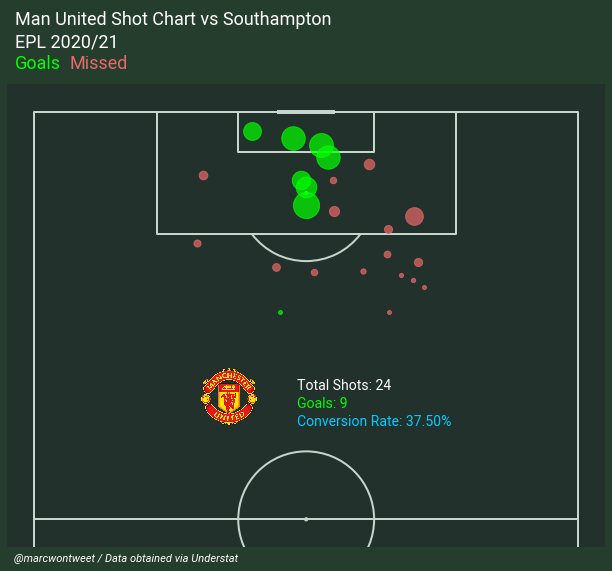

In [14]:
#set figure and axes
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#253d2d')
ax.patch.set_facecolor('#253d2d')

#create vertical pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8), tight_layout=True, constrained_layout=False, half=True)

pitch.draw(ax=ax)

#def plotShotMap():
for j in range (len(manutdshots['x'])):
    if manutdshots['result'][j] == 'Goal':
        sp = pitch.scatter(manutdshots['y'][j],manutdshots['x'][j], s=manutdshots['xG'][j]*900,c='#00ff00',alpha=.7,ax=ax)
    else:
        sp = pitch.scatter(manutdshots['y'][j],manutdshots['x'][j], s=manutdshots['xG'][j]*900,c='#ea6969',alpha=.7, ax=ax)

default = 'w'

#set title
s = '<Man United Shot Chart vs Southampton>\n<EPL 2020/21>\n<Goals>  <Missed>'
fig_text(x=0.37, y=0.95,
              fontsize=18,
              ha='center', va='center',
              s=s,
              highlight_textprops=[{"color": default},
                                   {"color": default},
                                   {"color": '#00ff00'},
                                   {"color": '#ea6969'}],
              fontname='Roboto',
              ax=ax)

s1 = '<Total Shots: {}>\n<Goals: 9>\n<Conversion Rate: {:.2f}%>'
ax_text(x=50, y=77,
              fontsize=14,
              ha='center', va='center',
              s=s1.format(len(manutdshots['x']), 9/len(manutdshots['x'])*100),
              highlight_textprops=[{"color": default},
                                   {"color": '#00ff00'},
                                   {"color": '#00ccff'}],
              fontname='Roboto',
              ax=ax)

#add Unietd logo
unitedlogo = plt.imread('manunited_logo.png')
imagebox = OffsetImage(unitedlogo, zoom=.05)

xy = [25,68]

ab = AnnotationBbox(imagebox,xy, boxcoords='offset points',frameon=False)
ax.add_artist(ab)

fig.text(.20,.1,"@marcwontweet / Data obtained via Understat",fontstyle='italic',fontsize=11,fontfamily='Roboto',color=default)

#save plotted figure as png
plt.savefig('MUNSOTshotmap.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')